## Assignment 4 - Text Analysis

이번 과제에서는 주어진 텍스트를 분석하여 워드클라우드 그래프를 그린다.

* 파일 이름: A4-학번-이름(영어로).iphynb 형식으로 (예: A4-13403-999-jiyoon.iphynb)

### Dataset

주어진 데이터는 네이버에서 크롤링한 영화평이다.

데이터는 다음과 같이 구성되어 있다.

```
id	document	label
2190435	사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화	1
9279041	완전 감동입니다 다시봐도 감동	1
7865729	개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음	1
...
9327892	타임 루프 소재중 거의 최악. 감독과 작가부터 자기 반성의 시간을 갖자	0
9953525	이쪽 저쪽 ...어디서 본듯한...내용이 뒤죽박죽 순수창작물인지?	0
7744648	전기세가 아까운 영화!	0
```

데이터를 보면 알 수 있듯이 긍정적인 평은 label이 1,
부정적인 평은 label 이 0이다.



### Q1: 긍정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

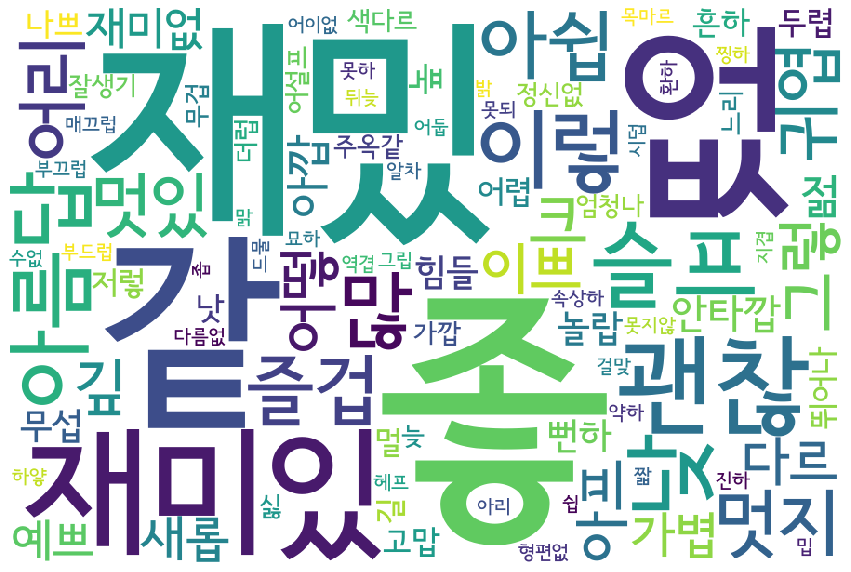

In [49]:
from konlpy.tag import Komoran
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from collections import Counter

# with open('naver_ratings.txt', 'r') as f:
#     lines = f.read().splitlines()
# sentences = [line for line in lines if line != '']

f1=open('naver_ratings.txt',"r")
lines1=f1.readlines()
result1=[]
for x in lines1:
    result1.append(x.split('\t'))
f1.close()

good_sentences = [mingu for mingu in result1 if mingu[2] == '1\n']

good_chosen_sentences = random.choices(good_sentences, k=1000)

tagger = Komoran()
tagged_sentences1=[]
for sent in good_chosen_sentences:
    tagged_sentences1.append(tagger.pos(sent[1]))
    
va_list1 = []
for sent in tagged_sentences1:    
    for word, tag in sent:
        if tag == 'VA':
            va_list1.append(word)

va_counts1 = Counter(va_list1)
            
cloud1 = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')
cloud1 = cloud1.fit_words(va_counts1)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud1)
plt.show()

### Q2: 부정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

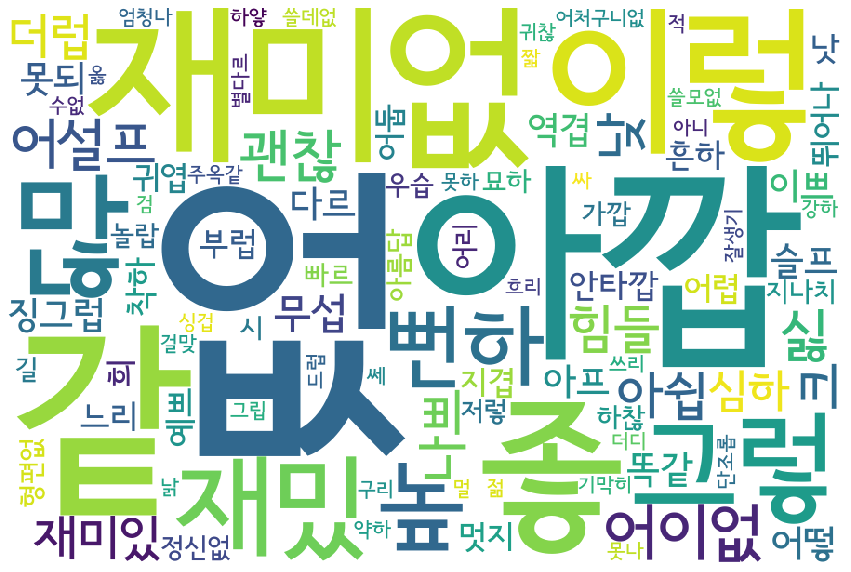

In [50]:
from konlpy.tag import Komoran
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from collections import Counter

# with open('naver_ratings.txt', 'r') as f:
#     lines = f.read().splitlines()
# sentences = [line for line in lines if line != '']

f2=open('naver_ratings.txt',"r")
lines2=f2.readlines()
result2=[]
for x in lines2:
    result2.append(x.split('\t'))
f2.close()

bad_sentences = [mingu for mingu in result2 if mingu[2] == '0\n']

bad_chosen_sentences = random.choices(bad_sentences, k=1000)

tagger = Komoran()
tagged_sentences2=[]
for sent in bad_chosen_sentences:
    tagged_sentences2.append(tagger.pos(sent[1]))
    
va_list2 = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag == 'VA':
            va_list2.append(word)

va_counts2 = Counter(va_list2)
            
cloud2 = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')
cloud2 = cloud2.fit_words(va_counts2)
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud2)
plt.show()